<a href="https://colab.research.google.com/github/Jakewilliamshort/EMAT-Preliminary-Report/blob/main/Numerically_Solved_Equation_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerically Solved Equation 8

'Import all packages required'

In [ ]:
import pandas as pd
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

'Set up function to be solved numerically'

In [ ]:
#requires np.exp() overwise it doesnt work. 
def dϕdt(t, ϕ, kI_0, μ, z):
    return kI_0*(1-ϕ)*np.exp(-μ*z)


'Set out required Constants and vectors'

In [ ]:
kI_0 = 0.0015
μ = 3.74

#Set the initial conditions as a vector of 100 zeros. Vector is required because its creating an array and isnt a scalar. 
ϕ = np.zeros(100)

#linspace from 0 to 1.15 with 100 increment inbetween.     
z = np.linspace(0, 1.5, 100) 

time_stop = 10800

'Solve the ODE with Solve_ivp'

In [ ]:
#used t_span and dont define the increment size in t_span because then the function will select an appropriate size. 
#use args to set the addional arguments with the ODE solver function. 
#dense_output = True is 100% required if the time is to be called within the plot.
#dense_outputbool, optional: Whether to compute a continuous solution. Default is False. 


sol_m1 = solve_ivp(dϕdt, y0=ϕ, t_span=(0, time_stop), args=(kI_0, μ, z),
dense_output=True)
   # sol_m2 = solve_ivp(dϕdt(t, ϕ, kI_0, μ, zi), t_span = (0, max(t)), y0 =[ϕ0], t_eval=t )         
    #d.append(sol_m1)
print(sol_m1)
#Select the full row of the last column of y to get the finally results for
#y because I need the full conversion fraction value which is 1 when the full time has elapsed. 
#this can be checked by changing the row (-1) to (1), this shows that only 1*10^-7 is the conversion fraction.  
#plt.plot(z, sol_m1.y[:,-1])


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  1.025e+04  1.080e+04]
        y: [[ 0.000e+00  1.500e-07 ...  9.972e-01  9.988e-01]
            [ 0.000e+00  1.417e-07 ...  9.984e-01  9.993e-01]
            ...
            [ 0.000e+00  5.812e-10 ...  5.784e-02  6.084e-02]
            [ 0.000e+00  5.492e-10 ...  5.474e-02  5.758e-02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f7cc2b53850>
 t_events: None
 y_events: None
     nfev: 92
     njev: 0
      nlu: 0


'Makes vector of time increments to be read'

In [ ]:
#time_red = np.arange(0,time_stop, 300)
time_red = [300, 600, 1800, 3600, 7200, 10800]

'Make labels that automatically update for 2D plots'

Text(0.5, 1.0, 'Liquid Conversion Fraction vs Depth \n (Numerically Solved)')

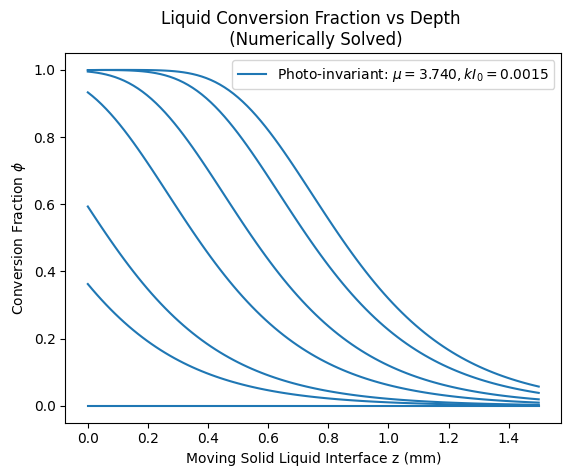

In [ ]:
#change decimal places with '3f' after the dot, to change the decimal places
label_1 = "Photo-invariant: " + "$\mu{} = " + f"{μ:.3f}, " + "kI_0 = " +  f"{kI_0:.4f}" + "$"


#Create one line at time is zero, so the label can be attached and not duplicated
plt.plot(z, sol_m1.sol(0),'tab:blue', label = label_1)


'Creates for loop that plot 2D graph for all different times'
for time_x in time_red:
    #The .sol() method (Function that belongs to an object) pulls from the continous function created by dense_output=True,
    #and therefore the values of y are selected for time t. 
    plt.plot(z, sol_m1.sol(time_x),'tab:blue')

'Add additions to graph'
plt.legend( loc = 'upper right')
plt.ylabel("Conversion Fraction $\phi{}$")
plt.xlabel("Moving Solid Liquid Interface z (mm)")
plt.title("Liquid Conversion Fraction vs Depth \n (Numerically Solved)")
